## Rider predictive modeling with Pycaret with feature-engineered Hour variable

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('bikeshare_data_clean.xlsx')

In [3]:
df.head()

,Unnamed: 0,Instant,Riders,Season,Month,Hour,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind
0,0,1,16,winter,January,Midnight,0,Saturday,0,Favorable,37,0.81,0.0
1,1,2,40,winter,January,Midnight,0,Saturday,0,Favorable,36,0.80,0.0
2,2,3,32,winter,January,Midnight,0,Saturday,0,Favorable,36,0.80,0.0
3,3,4,13,winter,January,Midnight,0,Saturday,0,Favorable,37,0.75,0.0
4,4,5,1,winter,January,Midnight,0,Saturday,0,Favorable,37,0.75,0.0


In [4]:
df.drop('Unnamed: 0',axis =1, inplace = True)

In [5]:
df.head()

,Instant,Riders,Season,Month,Hour,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind
0,1,16,winter,January,Midnight,0,Saturday,0,Favorable,37,0.81,0.0
1,2,40,winter,January,Midnight,0,Saturday,0,Favorable,36,0.80,0.0
2,3,32,winter,January,Midnight,0,Saturday,0,Favorable,36,0.80,0.0
3,4,13,winter,January,Midnight,0,Saturday,0,Favorable,37,0.75,0.0
4,5,1,winter,January,Midnight,0,Saturday,0,Favorable,37,0.75,0.0


In [6]:
df['Weekday'].unique()

array(['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Friday'], dtype=object)

In [7]:
df['Season'].unique()

array(['winter', 'spring', 'summer', 'fall'], dtype=object)

In [8]:
df_winter = df[df['Season']=='winter']
df_winter.reset_index(drop=True, inplace = True)

In [9]:
df_winter

,Instant,Riders,Season,Month,Hour,Holiday,Weekday,Workday,Weather,Temperature,Humidity,Wind
0,1,16,winter,January,Midnight,0,Saturday,0,Favorable,37,0.81,0.0000
1,2,40,winter,January,Midnight,0,Saturday,0,Favorable,36,0.80,0.0000
2,3,32,winter,January,Midnight,0,Saturday,0,Favorable,36,0.80,0.0000
3,4,13,winter,January,Midnight,0,Saturday,0,Favorable,37,0.75,0.0000
4,5,1,winter,January,Midnight,0,Saturday,0,Favorable,37,0.75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
4237,17375,119,winter,December,Evening,0,Monday,1,Relatively Favorable,34,0.60,0.1642
4238,17376,89,winter,December,Evening,0,Monday,1,Relatively Favorable,34,0.60,0.1642
4239,17377,90,winter,December,Evening,0,Monday,1,Favorable,34,0.60,0.1642
4240,17378,61,winter,December,Evening,0,Monday,1,Favorable,36,0.56,0.1343


In [10]:
#!pip install pycaret;

In [11]:
import numpy as np
from pycaret.regression import * 

In [12]:
df_winter.shape[0]

4242

In [13]:
# train = df_winter[0:4230]
# train.head()

In [14]:
cat_f = ['Season','Month','Weekday','Hour','Weather']

In [15]:
exp_reg101 = setup(data = df_winter,train_size=0.8, target = 'Riders', categorical_features = cat_f,
                   ignore_features= ['Instant','Season'],feature_selection = True,
                   normalize = True,session_id = 123)

,Description,Value
0,session_id,123
1,Target,Riders
2,Original Data,"(4242, 12)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3393, 23)"


In [16]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


### The running time is about 10 mins

In [17]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,52.6283,6766.6080,82.0823,0.5220,0.8483,1.4548,0.0450
rf,Random Forest Regressor,52.4164,6770.9986,82.1469,0.5205,0.8069,1.3602,0.2770
gbr,Gradient Boosting Regressor,55.6188,7173.1506,84.4682,0.4959,0.9013,1.7252,0.0700
et,Extra Trees Regressor,52.2098,7090.8071,84.0886,0.4949,0.8217,1.2732,0.2720
xgboost,Extreme Gradient Boosting,55.4609,7391.9657,85.8016,0.4767,0.9358,1.7602,28.8300
knn,K Neighbors Regressor,55.7485,7674.3594,87.4303,0.4575,0.9108,1.8670,0.0140
ridge,Ridge Regression,65.4417,8772.4203,93.3950,0.3850,1.0861,2.9791,0.0060
br,Bayesian Ridge,65.3263,8773.5488,93.3983,0.3850,1.0852,2.9662,0.0060
lasso,Lasso Regression,64.7316,8786.4323,93.4439,0.3848,1.0831,2.8913,0.0070
lr,Linear Regression,65.5572,8795.0851,93.5192,0.3834,1.0879,2.9760,1.3090


In [18]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,55.6350,7314.3748,85.5241,0.3783,0.8641,1.3982
1,49.0119,6284.5147,79.2749,0.5521,0.8292,1.2941
2,51.5472,6066.9739,77.8908,0.5327,0.7427,0.9193
3,48.7068,5930.2391,77.0080,0.5413,0.8948,1.7624
4,57.5996,8042.9906,89.6827,0.5314,0.7976,1.2620
5,50.3180,7105.8589,84.2963,0.5566,0.8071,1.4793
6,55.0602,7085.9076,84.1778,0.6004,0.8271,1.4029
7,55.0610,7327.4105,85.6003,0.4954,0.9274,1.7342
8,55.2916,7500.5539,86.6057,0.5144,0.9019,1.6871
9,48.0517,5007.2561,70.7620,0.5173,0.8914,1.6084


In [19]:
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,59.7924,7905.3126,88.9118,0.3281,0.9721,1.9440
1,52.5115,6528.9521,80.8019,0.5347,0.9517,1.7654
2,54.5708,6026.7434,77.6321,0.5358,0.8045,1.2876
3,53.8992,6574.6265,81.0841,0.4915,0.9781,2.2588
4,60.4406,8488.0916,92.1308,0.5054,0.8836,1.6399
5,53.8736,6972.0509,83.4988,0.5650,0.9522,2.0970
6,57.1030,7434.5168,86.2236,0.5807,0.8364,1.3462
7,58.0206,7683.5321,87.6558,0.4709,1.0198,2.1566
8,59.9999,8180.8393,90.4480,0.4704,0.9405,1.9304
9,53.7626,5557.5138,74.5487,0.4642,1.0162,2.1326


In [20]:
print(tuned_lightgbm)

LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
              random_state=123, reg_alpha=2, reg_lambda=3, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


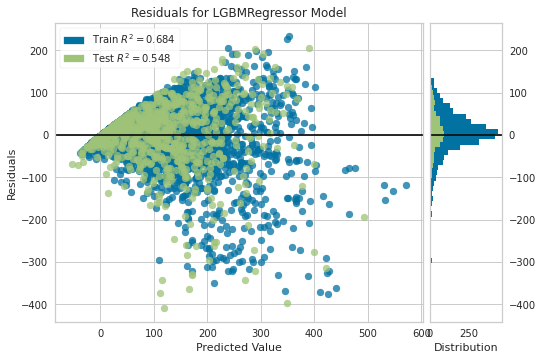

In [21]:
plot_model(tuned_lightgbm)

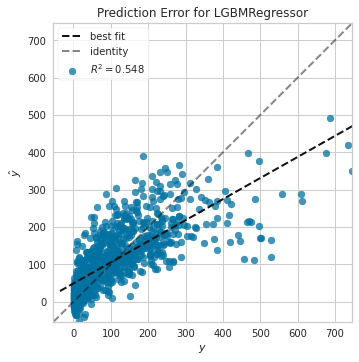

In [22]:
plot_model(tuned_lightgbm, plot = 'error')

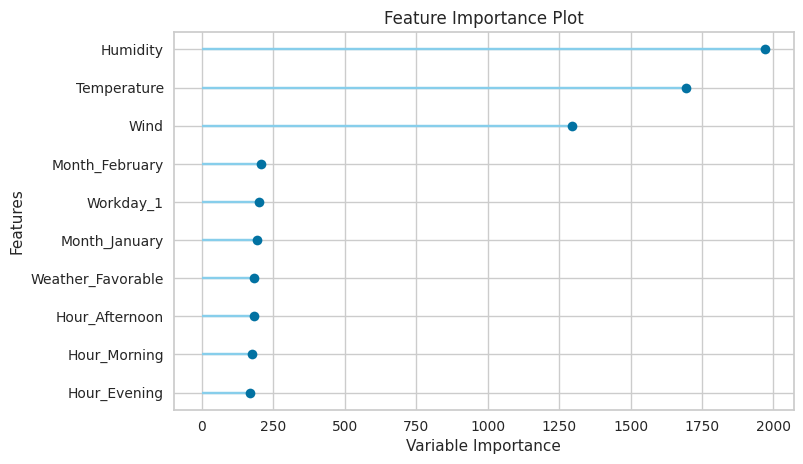

In [23]:
plot_model(tuned_lightgbm, plot = 'feature')

In [24]:
##evaluate_model(tuned_lightgbm)

## Predict on Test Data

In [25]:
predict_model(tuned_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,52.8446,6131.5996,78.3045,0.5481,0.9143,1.8167


,Holiday_1,Weekday_Tuesday,Weekday_Sunday,Weather_Favorable,Weather_Relatively Favorable,Month_March,Month_February,Weekday_Thursday,Workday_1,Temperature,...,Weekday_Friday,Weekday_Saturday,Weekday_Monday,Hour_Afternoon,Hour_Evening,Month_December,Weather_Relatively Unfavorable,Hour_Midnight,Riders,Label
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.139816,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,259.0,288.520272
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.992453,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,182.0,124.699183
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.213497,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,110.0,169.512357
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.992453,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,11.0,106.785460
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.181956,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,223.0,130.689299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.439037,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,112.0,106.016973
845,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.476682,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,92.0,180.260007
846,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.849585,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,80.0,103.843196
847,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,-0.775903,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0,74.927281


## Finalizing model for deployment

In [26]:
final_lightgbm = finalize_model(tuned_lightgbm)
print(final_lightgbm)

LGBMRegressor(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
              n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
              random_state=123, reg_alpha=2, reg_lambda=3, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [27]:
predict_model(final_lightgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,41.8627,3930.3848,62.6928,0.7103,0.8143,1.4997


,Holiday_1,Weekday_Tuesday,Weekday_Sunday,Weather_Favorable,Weather_Relatively Favorable,Month_March,Month_February,Weekday_Thursday,Workday_1,Temperature,...,Weekday_Friday,Weekday_Saturday,Weekday_Monday,Hour_Afternoon,Hour_Evening,Month_December,Weather_Relatively Unfavorable,Hour_Midnight,Riders,Label
0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.139816,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,259.0,273.750779
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.992453,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,182.0,149.360191
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.213497,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,110.0,114.325272
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.992453,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,11.0,113.149580
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.181956,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,223.0,146.935582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.439037,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,112.0,80.850977
845,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.476682,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,92.0,166.160080
846,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.849585,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,80.0,96.786915
847,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,-0.775903,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0,37.008460


## Save the model for future use 

In [28]:
save_model(final_lightgbm,'Final Predictive Model 26Aug2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Month', 'Weekday',
                                                             'Hour', 'Weather'],
                                       display_types=True,
                                       features_todrop=['Instant', 'Season'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Riders',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categori...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.4,
                                importance_type='split', learning_rate=0.1,
                                max_depth=-1, min_ch